<a href="https://colab.research.google.com/github/alexdel1/graph_csv_to_svg/blob/main/RepresentationGroupesAbeliens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 [![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)
[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)
[![made-with-Markdown](https://img.shields.io/badge/Made%20with-Markdown-1f425f.svg)](http://commonmark.org)
[![made-with-mathjax](https://img.shields.io/badge/Made%20with-MathJax-1f425f.svg)](https://www.mathjax.org/)
[![GitHub](https://badgen.net/badge/icon/github?icon=github&label)](https://github.com/alexdel1/TestPresentation/)
<a href="https://colab.research.google.com/github/alexdel1/TestPresentation/blob/main/RepresentationGroupesAbeliens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>  
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/alexdel1/TestPresentation/HEAD)  
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/alexdel1/TestPresentation/blob/main/RepresentationGroupesAbeliens.ipynb)



Rappel : Menu View : \
Toggle zen mode (not available im jupyter lab)\
: Appearance :\
Table of Contents (tick numbered AND untick first header) \
only simple interface

Menu Settings : Jupyter dark

Test regularly on Binder-JupyterLab-Zoom \
Make a back-up pdf(slide) and html

**create** a **vm** with binder and edit from github dev...
%%load ...notebook pour avoir accès à deux notebook en même temps (équivalent à un import de github)

In [ ]:
!jupyter server list

Currently running servers:


In [ ]:
!jupyter server list | grep -oP 'token=\K[^ ]+'

In [ ]:

import os
print(os.environ.get('COLAB_RELEASE_TAG', 'Not in Colab'))

release-colab_20241203-060126_RC01


empty cell to drag the output to get the token for zoom

Nom : Alexandre Delode \
Date : 05/12/2024 \

Réf : B. Steinberg, Representation theory of finite groups

##### Macros Latex et Bibliothèques Python


**Macros Latex:**

```latex
$
\def\GL{\mathbb{GL}}
\def\RR{\mathbb{R}}
\def\ZZ{\mathbb{Z}}
$
```

$
\def\GL{\mathbb{GL}}
\def\RR{\mathbb{R}}
\def\ZZ{\mathbb{Z}}
$
$$
\require{color}
\newcommand{\doubleequivl}
{\mathrel{\overset{\text{irr}}{\mathrel{\overset{\color{red}\Longleftarrow}{\Longrightarrow}}}}}\newcommand{\doubleequivr}
{\mathrel{\overset{\mathrm{deg}=1}{\mathrel{\overset{\color{red}\Longrightarrow}{\Longleftarrow}}}}}$$

Test: Maintenant $\GL(n, \RR)$ fonctionne directement dans le markdown.

In [ ]:

%%capture
!pip install git+https://github.com/alexdel1/graph_csv_to_svg.git
!sudo apt update
!sudo apt install graphviz libgraphviz-dev
!pip install pygraphviz
!pip install dot2tex
!sudo apt install pdf2svg
!sudo apt update
!sudo apt install texlive-xetex

In [ ]:

import pandas as pd
import io
import unicodedata
import re
import networkx as nx
import pygraphviz # Import the Graph class
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import SVG
import subprocess


from graph_csv_to_svg import csv_to_svg

# **Représentation des groupes abéliens** <!-- omit in toc -->

## Rappel groupe abélien fini

### Définition

#### Groupe

Un ensemble et une loi de composition interne (LCI) :
* un symétrique pour chaque élément
* associative
* un élément neutre

#### Abélien


$$ x \cdot y = y \cdot x \,\,\,\,\, \forall x, y \in G $$

#### Fini

$$\mathrm{card}(G)<\infty$$

<details>
<summary>À ne pas confondre avec de "type fini"</summary>

$$\forall x \in G, \, \exists x_1, x_2, \dots, x_s \in G \text{ et } \exists n_1, n_2, \dots, n_s \in \mathbb{Z} \text{ tel que } x = n_1 x_1 + n_2 x_2 + \cdots + n_s x_s$$
où $ s $ est un nombre fini fixé.


Une autre définition équivalente est que le rang défini ci-dessous doit être fini :

$$\mathrm{rang}(G) = \min \left( |X| \mid \langle X \rangle = G\right) $$
</details>

### Exemples

Si $G$ est un groupe abélien et $\sim$ est compatible, alors $G /\sim$ est aussi abélien.

Un groupe cyclique est un groupe qui est à la fois fini et monogène.

Tout groupe cyclique est abélien. (Ex : $\ZZ / n \ZZ$)

Tout sous-groupe d'un groupe abélien fini est abélien et fini.

Tout produit direct d'une famille finie de groupes abéliens finis est un groupe abélien fini.

### Contre exemples

Le groupe linéaire général $\left( \mathbb{GL}(n, K)  \right)$, constitué des matrices inversibles $\left( n \times n \right)$ à coefficients dans un corps \( K \), **n'est pas abélien** pour \( n > 1 \). \

### Théorème de structure des groupes abéliens finis

## Rappel de la théorie de la représentation des groupes

### Définition

####Algèbre de groupe L(G)


<u>Algèbre de groupe 4.2.1</u>

Soit $G$ un groupe et définissons $L(G) = \mathbb{C}^G = \{f \mid f : G \to \mathbb{C}\}$. Alors $L(G)$ est un espace préhilbertien avec l'addition et la multiplication scalaire données par
$\begin{align*}
    (f_1 + f_2)(g) &= f_1(g) + f_2(g), \\
    (cf)(g) &= c \cdot f(g),
\end{align*}$

et avec le produit hermitien défini par
$\langle f_1, f_2 \rangle = \frac{1}{|G|} \sum_{g \in G} f_1(g) \overline{f_2(g)}$.

#### Fonction de classe et $Z(G)$

<u>Fonction de classe 4.3.6</u>:

$f: G \rightarrow \mathbb{C}$ tel que $f(g) = f(hgh^{-1}) \quad \forall g, h \in G$.

Fonction constante sur les classes de conjugaison.

$\underline{Z(L(G)) \text{4.3.6}}:$

$Z(L(G))=\{f : G \to \mathbb{C} \mid f(g) = f(hgh^{-1}) \quad \forall g, h \in G \} $

Espace des fonctions de classe.

Alternative to github for dev:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/csv_to_svg_c.ipynb"

here 1                       texlbl                      name
0                   éq. déc.                  éq. déc.
1                   éq. irr.                  éq. irr.
2             éq. comp. réd.            éq. comp. réd.
3                      unit.                     unit.
4                  éq. unit.                 éq. unit.
5       éq. irr. ou éq. déc.      éq. irr. ou éq. déc.
7                       fini                      fini
9              irr. ou déc.1             irr. ou déc.1
11             irr. ou déc.2             irr. ou déc.2
13                      irr.                      irr.
15                phinsimrho                phinsimrho
16                phiegalrho                phiegalrho
18                    phirho                    phirho
19               phirho irr.               phirho irr.
20  phinsimrho ou phiegalrho  phinsimrho ou phiegalrho
0                       déc.                      déc.
2                 comp. réd.                comp. réd.
13 

<ipython-input-10-ac7904ad4654>:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
<ipython-input-10-ac7904ad4654>:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,texlbl,name,shape,color,lblstyle
0,éq. déc.,eq_dec,rectangle,black,black
1,éq. irr.,eq_irr,rectangle,black,black
2,éq. comp. réd.,eq_comp_red,rectangle,black,black
3,unit.,unit,rectangle,black,black
4,éq. unit.,eq_unit,rectangle,black,black
5,$\mathrm{ou}$,eq_irr_ou_eq_dec,diamond,gray,gray
6,$\mathrm{card}(G)<\infty$,fini,rectangle,red,blue
7,$\mathrm{ou}$,irr_ou_dec1,diamond,blue,blue
8,$\mathrm{ou}$,irr_ou_dec2,diamond,red,red
9,irr.,irr,rectangle,black,black


This is XeTeX, Version 3.141592653-2.6-0.999993 (TeX Live 2022/dev/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./teststandalone.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v

In [ ]:
# Parse the CSV data
csv_data = r"""source,target,label,style,color,lblstyle
éq.,classe éq.,3.1.7,,{week1},{week1}
deg. 1,irr.,3.1.16,{week1},{week1}
éq. déc.,déc.,3.1.23,,{week1},{week1}
éq. irr.,irr.,3.1.24,,{week1},{week1}
éq. comp. réd.,comp. réd.,3.1.25,,{week1},{week1}
unit.,irr. ou déc.2,3.2.3,,{week2},{week2}
éq. unit.,éq. irr. ou éq. déc.,éq. 3.2.3,,{week2},{week2}
éq. irr. ou éq. déc.,éq. irr.,,,{week2},{week2}
éq. irr. ou éq. déc.,éq. déc.,,,{week2},{week2}
fini,éq. unit.,3.2.4,,{week2},{week2}
fini,irr. ou déc.1,3.2.5,,{week2},{week2}
irr. ou déc.1,irr.,,,{week2},{week2}
irr. ou déc.1,déc.,,,{week2},{week2}
irr. ou déc.2,irr.,,,{week2},{week2}
irr. ou déc.2,déc.,,,{week2},{week2}
irr.,indéc.,3.2.7 pas la réciproque,,{week2},{week2}
irr.,irr. ou déc.3,,dashed,{week2},{week2}
déc.,irr. ou déc.3,,dashed,{week2},{week2}
irr. ou déc.3,fini et irr. ou déc.3,,dashed,{week2},{week2}
fini,fini et irr. ou déc.3,,,{week2},{week2}
fini et irr. ou déc.3,comp. réd.,3.2.8 Th. Maschke,,{week2},{week2}
irr.,phirhoirr.,,,{week3},{week3}
phirhoirr.,phirho irr.,,,{week3},{week3}
phirho irr. et phinsimrho,homgphirho0,4.1.6 Lemme Schur,,{week3},{week3}
phirho irr. et phisimrho,homgphirho1,4.1.6 Lemme Schur,,{week3},{week3}
phirho irr. et phiegalrho,Thomothetie,4.1.6 Lemme Schur,,{week3},{week3}
phirho irr.,phirho irr. et phinsimrho,,,{week3},{week3}
phinsimrho,phirho irr. et phinsimrho,,,{week3},{week3}
phirho irr.,phirho irr. et phisimrho,,,{week3},{week3}
phisimrho,phirho irr. et phisimrho,,,{week3},{week3}
phirho irr.,phirho irr. et phiegalrho,,,{week3},{week3}
phiegalrho,phirho irr. et phiegalrho,,,{week3},{week3}
groupe,groupe et commutatif,,,{week3},{week3}
commutatif,groupe et commutatif,,,{week3},{week3}
groupe et commutatif,abélien,,,{week3},{week3}
abélien,abélien et irr.,,,{week3},{week3}
irr.,abélien et irr.,,,{week3},{week3}
abélien et irr.,deg. 1,4.1.8,,{week3},{week3}
abélien,abélien et fini,,,{week3},{week3}
fini,abélien et fini,,,{week3},{week3}
abélien et fini,diag.,4.1.9,,{week3},{week3}
fini,fini et phinsimrho et phirho irr. et unit.,,,{week4},{week4}
phinsimrho,fini et phinsimrho et phirho irr. et unit.,,,{week4},{week4}
phirho irr.,fini et phinsimrho et phirho irr. et unit.,,,{week4},{week4}
unit.,fini et phinsimrho et phirho irr. et unit.,,,{week4},{week4}
fini et phinsimrho et phirho irr. et unit.,relorthoschur,4.2.8 Relations Orthogonalité Schur,,{week4},{week4}
phisimrho,chiphiegalchirho,4.3.4,,{week5},{week5}
fini,fini et phirho irr.,,,{week5},{week5}
phirho irr.,fini et phirho irr.,,,{week5},{week5}
fini et phirho irr.,premrelortho,4.3.9 Première relation d'orthogonalité,,{week5},{week5}
fini,fini et phinsimrho et phirho irr.,,,{week5},{week5}
phinsimrho,fini et phinsimrho et phirho irr.,,,{week5},{week5}
phirho irr.,fini et phinsimrho et phirho irr.,,,{week5},{week5}
fini et phinsimrho et phirho irr.,phirho ortho set,4.3.9,,{week5},{week5}
fini,irr. et classe éq.,,,{week5},{week5}
#Airr.,irr. et classe éq., ,dashed,{week5},{week5}
classe éq.,irr. et classe éq., ,dashed,{week5},{week5}
comp. réd.,irr. et classe éq., ,dashed,{week5},{week5}
premrelortho,irr. et classe éq., ,dashed,{week5},{week5}
irr. et classe éq.,unique déc.,4.3.14,,{week5},{week5}
irr.,chirhochirho1,4.3.15,,{week5},{week5}
chirhochirho1,irr., ,,{week5},{week5}
rég.,unit.,4.4.2,,{week6},{week6}
abélien et fini,G. éq.,4.4.9,,{week7},{week7}
G. éq.,G. éq. et fini,,,{week7},{week7}
fini,G. éq. et fini,,,{week7},{week7}
G. éq. et fini,abélien,4.4.9,,{week7},{week7}
fini,secrelortho,4.4.12 Seconde relation d'orthogonalité,,{week7},{week7}
"""

csv_node=r"""name,texlbl,shape,color,lblstyle
éq.,"$\begin{aligned}\text{équivalence 3.1.7 : }\phi \sim \rho \text{ si } \exists T \forall g \text{ tel que } \phi_g=T\rho_gT^{-1} \\ \sim \text{ est une relation d'équivalence } \end{aligned}$",,{week1},{week1}
classe éq.,"$\begin{aligned}\sim \text{ réalise une partition des représentations de groupe} \\ \text{On peut construire un ensemble des représentants: } \phi^{(1)} \,\dots \phi^{(s)} \end{aligned}$",,{week1},{week1}
fini,$\mathrm{card}(G)<\infty$,,{week1},{week1}
comp. réd.,$\phi\sim\phi^{(1)}\oplus\phi^{(2)}\dots\oplus\phi{(n)}\text{ avec }\phi^{(i)} \text{ irr .}$,,{week2},{week2}
éq. déc.,,,{week1},{week1}
déc.,,,{week1},{week1}
éq. irr.,,,{week1},{week1}
irr.,,,{week1},{week1}
éq. comp. réd.,,,{week1},{week1}
unit.,,,{week2},{week2}
éq. unit.,,,{week2},{week2}
indéc.,,,{week2},{week2}
irr. ou déc.1,$\mathrm{ou}$,diamond,{week2},{week2}
éq. irr. ou éq. déc.,$\mathrm{ou}$,diamond,{week2},{week2}
irr. ou déc.2,$\mathrm{ou}$,diamond,{week2},{week2}
irr. ou déc.3,$\mathrm{ou}$,diamond,{week2},{week2}
fini et irr. ou déc.3,$\mathrm{et}$,diamond,{week2},{week2}
phirho irr. et phinsimrho,$\mathrm{et}$,diamond,{week3},{week3}
phirho irr. et phisimrho,$\mathrm{et}$,diamond,{week3},{week3}
phirho irr. et phiegalrho,$\mathrm{et}$,diamond,{week3},{week3}
phinsimrho,$\phi\nsim\rho$,,{week3},{week3}
phisimrho,$\phi\sim\rho$,,{week3},{week3}
phinsimrho,$\phi\nsim\rho$,,{week3},{week3}
phiegalrho,$\phi = \rho$,,{week3},{week3}
homgphirho0,"$\mathrm{Hom}_G(\phi, \rho)=\{0\}$",,{week3},{week3}
homgphirho1,"$\mathrm{dim}\left(\mathrm{Hom}_G(\phi, \rho)\right)=1$",,{week3},{week3}
Thomothetie,"$\mathrm{Hom}_G(\phi, \rho)=\{\lambda I\}$",,{week3},{week3}
phi et rho,$\mathrm{et},diamond,{week3},{week3}
phirho,"$\phi,\rho$",,{week3},{week3}
phirhoirr.,"$\phi,\rho$",diamond,{week3},{week3}
phirho irr.,"$\phi,\rho\quad\mathrm{irr.}$",,{week3},{week3}
deg. 1,"$\mathrm{deg}(\phi)=1$",,{week3},{week3}
abélien et irr.,$\mathrm{et}$,diamond,{week3},{week3}
abélien,,,{week3},{week3}
groupe,,,{week3},{week3}
commutatif,,,{week3},{week3}
groupe et commutatif,$\mathrm{et}$,diamond,{week3},{week3}
abélien et fini,$\mathrm{et}$,diamond,{week3},{week3}
diag.,"$\exists T \,\forall g \quad T^{-1}\phi_gT \quad\mathrm{diagonale}$",,{week3},{week3}
fini et phinsimrho et phirho irr. et unit.,$\mathrm{et}$,diamond,{week3},{week3}
relorthoschur,"$\begin{aligned}&1. ⟨\phi_{ij},\rho_{kl}⟩ = 0 \\&2. ⟨\phi_{ij},\phi_{kl}⟩ = \begin{cases}\frac{1}{n}, & \text{si } i = k \text{ et } j = 0 \\0, & \text{sinon.}\end{cases}\end{aligned}$",,{week4},{week4}
chiphiegalchirho,$\chi_\phi=\chi_\rho$,,{week5},{week5}
premrelortho,"$<\chi_{\phi}, \chi_{\rho}> = \begin{cases}1, & \text{si } \phi \sim \rho \\0, & \text{si } \phi \not\sim \rho\end{cases}$",,{week5},{week5}
fini et phirho irr.,$\mathrm{et}$,diamond,{week5},{week5}
fini et phinsimrho et phirho irr.,$\mathrm{et}$,diamond,{week5},{week5}
chirhochirho1,"$<\chi_{\rho}, \chi_{\rho}> = 1$",,{week5},{week5}
phirho ortho set,"$\{\chi_\phi,\chi_\rho\}\text{ est un ensemble orthonormal de }Z(G)$",,{week5},{week5}
irr. et classe éq.,$\mathrm{et}$,diamond,{week5},{week5}
unique déc.,"$\vcenter{\hbox{$\begin{array}{c}\phi \sim {\phi^{(1)}}^{\oplus m_1} \oplus  {\phi^{(2)}}^{\oplus m_2} \oplus ... \oplus  {\phi^{(k)}}^{\oplus m_k} \\\text{Existence et unicité de l'équivalent au choix des représentants des classes pour les représentations irréductibles près}\end{array}$}}$",,{week5},{week5}
secrelortho,"$\sum_{i=1}^s \chi_i(g) \overline{\chi_i(h)} = \begin{cases} \frac{|G|}{|\overline{g}|}, & \text{si } \overline{g}=\overline{h} \\0, & \text{sinon.}\end{cases}$",,{week7},{week7}
rég.,,,{week6},{week6}
G. éq.,"$\left\vert \mathrm{Hom}_{irr}(G,GL(V))/{ \sim }\right\vert=|G|$",,{week7},{week7}
G. éq. et fini,$\mathrm{et}$,diamond,{week7},{week7}
"""

$\left\vert \mathrm{Hom}(G,GL(V))/{ \sim }\right\vert=|G|$
$\left\vert \mathrm{Hom}\(G,GL(V))/\sim \right\vert=|G|$"

In [ ]:

csv_col=r"""week,color
week1,black
week2,black
week3,black
week4,black
week5,black
week6,black
week7,black
"""
csv_col_df= pd.read_csv(io.StringIO(csv_col), comment='#')
#print(csv_col)
csv_col_list=[csv_col_df.copy() for i in range(7)]
#print(csv_col_list)
for i in range(7):
       print(i)
       csv_col_list[i].loc[csv_col_list[i].index==i,'color']='red'
       csv_col_list[i].loc[csv_col_list[i].index>i,'color']="transparent"
#print(csv_col_list)
dict_col_list = [dict(zip(df.week, df.color)) for df in csv_col_list]
print(dict_col_list)


csv_col_df= pd.read_csv(io.StringIO(csv_col), comment='#')
#print(csv_col)
csv_col_list=[csv_col_df.copy() for i in range(7)]
#print(csv_col_list)
for i in range(7):
       print(i)
       csv_col_list[i].loc[csv_col_list[i].index==i,'color']='red'
       csv_col_list[i].loc[csv_col_list[i].index>i,'color']="black!0"
#print(csv_col_list)
dict_col_list_edge = [dict(zip(df.week, df.color)) for df in csv_col_list]
print(dict_col_list_edge)

0
1
2
3
4
5
6
[{'week1': 'red', 'week2': 'transparent', 'week3': 'transparent', 'week4': 'transparent', 'week5': 'transparent', 'week6': 'transparent', 'week7': 'transparent'}, {'week1': 'black', 'week2': 'red', 'week3': 'transparent', 'week4': 'transparent', 'week5': 'transparent', 'week6': 'transparent', 'week7': 'transparent'}, {'week1': 'black', 'week2': 'black', 'week3': 'red', 'week4': 'transparent', 'week5': 'transparent', 'week6': 'transparent', 'week7': 'transparent'}, {'week1': 'black', 'week2': 'black', 'week3': 'black', 'week4': 'red', 'week5': 'transparent', 'week6': 'transparent', 'week7': 'transparent'}, {'week1': 'black', 'week2': 'black', 'week3': 'black', 'week4': 'black', 'week5': 'red', 'week6': 'transparent', 'week7': 'transparent'}, {'week1': 'black', 'week2': 'black', 'week3': 'black', 'week4': 'black', 'week5': 'black', 'week6': 'red', 'week7': 'transparent'}, {'week1': 'black', 'week2': 'black', 'week3': 'black', 'week4': 'black', 'week5': 'black', 'week6': 'bl

here 1                                         texlbl  \
0                                          éq.   
1                                       deg. 1   
2                                     éq. déc.   
3                                     éq. irr.   
4                               éq. comp. réd.   
5                                        unit.   
6                                    éq. unit.   
7                         éq. irr. ou éq. déc.   
9                                         fini   
11                               irr. ou déc.1   
13                               irr. ou déc.2   
15                                        irr.   
17                                        déc.   
18                               irr. ou déc.3   
20                       fini et irr. ou déc.3   
22                                  phirhoirr.   
23                   phirho irr. et phinsimrho   
24                    phirho irr. et phisimrho   
25                   phirho irr. et phiegal

<ipython-input-10-ac7904ad4654>:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  B['shape'].fillna("rectangle", inplace=True)
<ipython-input-10-ac7904ad4654>:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

ipynb version


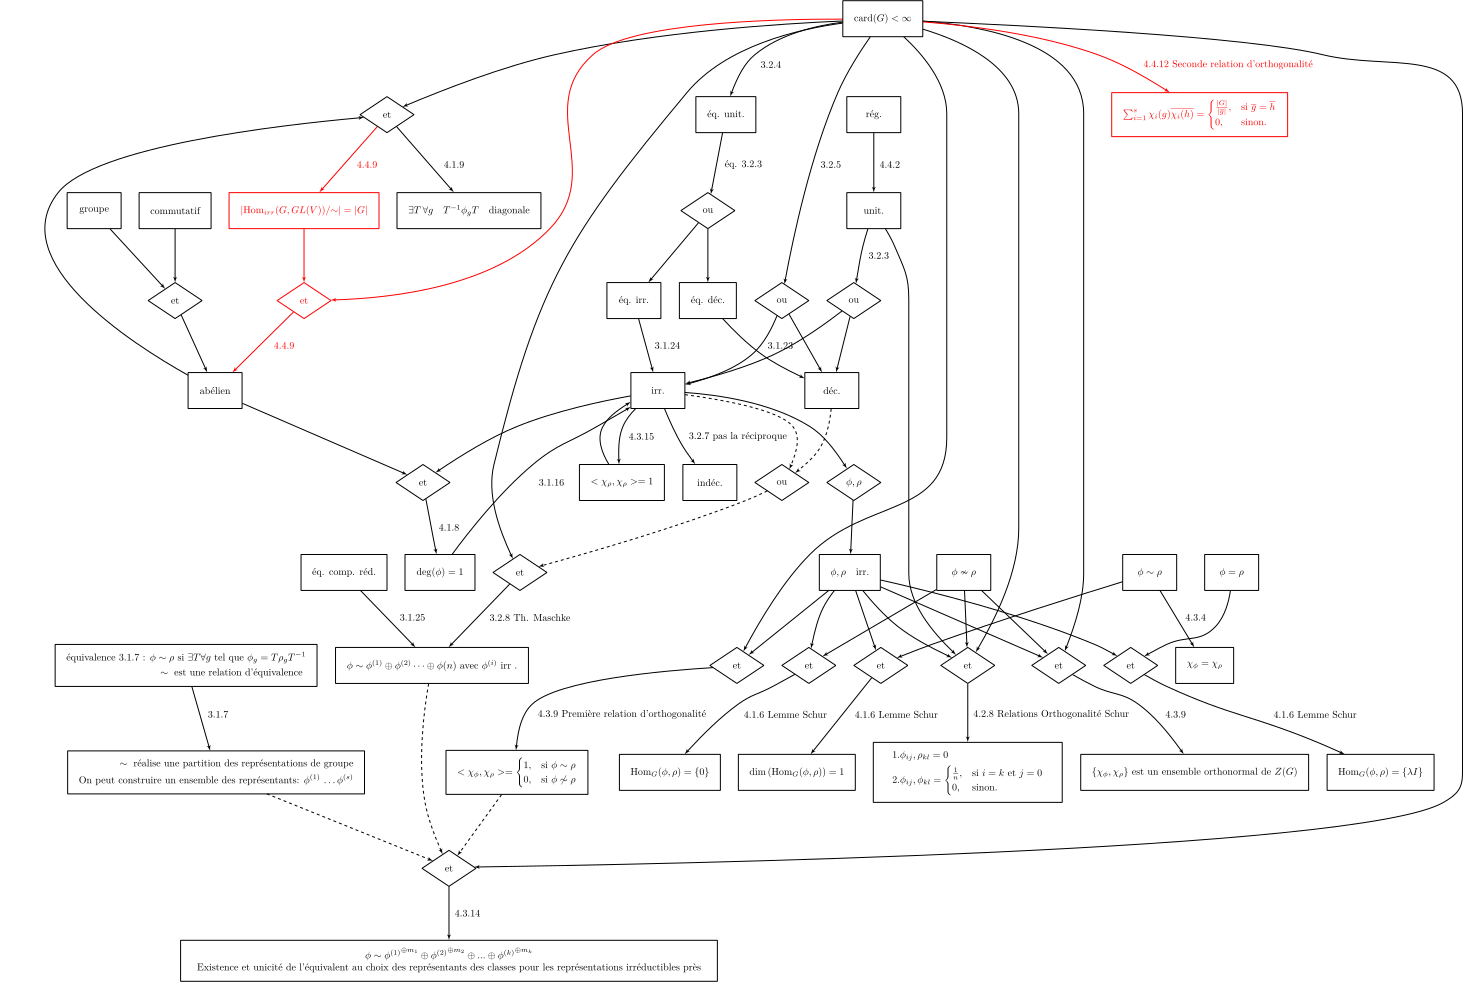

In [ ]:
#replacements={'week1':"white",'week2':"blue",'week3':"pink",'week4':"brown",'week5':"yellow",'week6':"orange",'week7':"red"}
#print(dict_col_list[0])
week=7
id=week-1
csv_data_col=replace_csv_placeholders(csv_data,dict_col_list_edge[id])
csv_node_col=replace_csv_placeholders(csv_node,dict_col_list[id])
#print(csv_data)
#print(dict_col_list[1])
csv_data_col

Grep=csv_to_svg(csv_data_col,csv_node_col,"testouet")

In [ ]:
!xelatex testouet.tex

This is XeTeX, Version 3.141592653-2.6-0.999993 (TeX Live 2022/dev/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./testouet.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n S

Imprimer en A3 et noter les différentes étapes. faire une construction progressive en plusieurs svg par presentation en mettant les semaines passées en gris.

## Théorème de représentation des groupes abéliens finis

###Lemme des représentations irréductibles de même traces

Par les premières relations d'orthogonalité pour les représentations irréductibles, on a l'équivalence:

$$\phi \sim \rho \doubleequivl \chi_{\phi} = \chi_{\rho}$$

###Lemme des classes singletons en degré 1###


Si $\mathrm{deg}(\phi)=1$ alors $\phi$ est irréductible, $\chi_{\phi} = \phi$ et on a les équivalences, \
$$
\require{color}
\newcommand{\doubleequivl}
{\mathrel{\overset{\text{irr}}{\mathrel{\overset{\color{red}\Longleftarrow}{\Longrightarrow}}}}}\newcommand{\doubleequivr}
{\mathrel{\overset{\mathrm{deg}=1}{\mathrel{\overset{\color{red}\Longrightarrow}{\Longleftarrow}}}}}
 \phi \sim \rho \doubleequivl \chi_{\phi} = \chi_{\rho} \doubleequivr \phi = \rho $$

In [ ]:

def graph_extract(Grep,nodeini,pre,suc,*args):

    #nodeini={"abelien"}
    #print(nodeini)
    finalnodes=set()
    finalnodes.update(nodeini)
    nodes=nodeini
    all_predecessors = set()
    #pre=2
    for _ in range(pre):
        for node in nodes:
            #print(nodes)
            all_predecessors.update(Grep.predecessors(node))
        nodes=all_predecessors.copy()

    finalnodes.update(nodes)
    nodes=nodeini
    all_successors = set()
    #suc=2
    for _ in range(suc):
        for node in nodes:
            #print(nodes)
            all_successors.update(Grep.successors(node))
        nodes=all_successors.copy()

    finalnodes.update(nodes)
    #print(finalnodes)

    addele=[]
    for ele in finalnodes:
        if Grep.nodes[ele]['shape']=="diamond":
            #print(ele)
            addele+=list(Grep.predecessors(ele))

    finalnodes.update(addele)
    #subgraph = Grep.subgraph(finalnodes)
    #nx_to_svgf(subgraph,test)
    for arg in args:

        finalnodes.update(graph_extract(Grep,*arg))
        #print(arg)
    return finalnodes

def G_E(Grep,nodeini,pre,suc,*args):
    return nx_to_svg(Grep.subgraph(graph_extract(Grep,nodeini,pre,suc,*args)))

###Propriété 4.5.1 produit cartésien et produit de caractère

(4.5.1) \
Soit $G_1$,$G_2$ des groupes abéliens. \
$\chi_1,\dots,\chi_m$ et $\phi_1,\dots,\phi_n$ sont les représentations irréductibles de $G_1$ et $G_2$, respectivement. \
En particulier, $m=|G_1|$ et $n=|G_2|$. \
Alors les fonctions $\alpha_{ij} : G_1 \times G_2 \rightarrow \mathbb{C}^*$ avec $1\leq i\leq m$ et $1\leq j \leq n$ donnée par: \
$$ \tag{1} \alpha_{ij}(g_1,g_2)=\chi_i(g_1)\phi_j(g_2)$$
forment un ensemble complet de représentations irréductibles de $G_1 \times G_2$.

<u>**Démonstration**</u>

1. *$\chi_1,\dots,\chi_m$ et $\phi_1,\dots,\phi_n$ sont les représentations irréductibles de $G_1$ et $G_2$, respectivement. En particulier, $m=|G_1|$ et $n=|G_2|$. \*

ipynb version


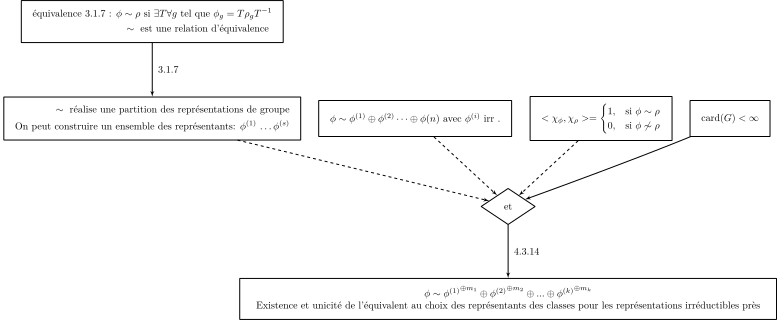

In [ ]:
_=G_E(Grep,{'unique_dec'},1,0,({'classe_eq'},1,0),({'comp_red'},0,2))

ipynb version


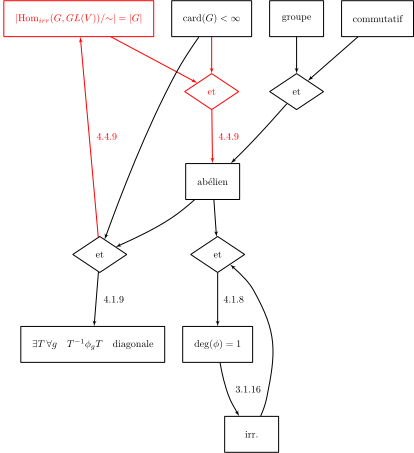

In [ ]:
_=G_E(Grep,{"abelien"},2,2)

Par le lemme des classes singletons, ce sont les seuls. En effet, la représentation triviale (3.1.3)  appartient à  $\mathrm{Hom}_{irr}(G,\mathbb{C}^*)$. Donc cet ensemble est non vide. Prenons $\sim$ pour réaliser une partition de $\mathrm{Hom}_{irr}(G,\mathbb{C}^*)$. Soit $\rho$ une représentation irréductible. Donc $\rho$ appartient forcément à une des classes d'équivalence (disons la $i$). En utilisant le lemme: \
 $$\rho \sim \chi_i  \implies \chi_{\rho} = \chi_i \iff \rho=\phi^{(i)}$$
On a bien existence et unicité de l'ensemble des représentants.

3. $\alpha_{ij} \in \mathrm{Hom}_{irr}(G_1 \times G_2 ,\mathbb{C}^*)$



Le produit cartésien est muni d'une loi de composition interne $•_{G_1 \times G_2} $ : \
$(g_1, g_1^\prime) •_{G_1 \times G_2} (g_2, g_2^\prime) = (g_1 •_{G_1} g_2\,\, , \,\, g_1^\prime •_{G_2} g_2^\prime)$ \

$\forall (g_1,g_2) \in G_1 \times G_2 $ et $\forall (g_1^\prime,g_2^\prime) \in G_1 \times G_2$ : \
$
\begin{align*}
\alpha_{ij}(g_1,g_2)\alpha_{ij}(g_1^\prime,g_2^\prime) &= \chi_i(g_1)\phi_j(g_2)\chi_i(g_1^\prime)\phi_j(g_2^\prime)  \\
&= \chi_i(g_1)\chi_i(g_1^\prime)\phi_j(g_2)\phi_j(g_2^\prime) \\
&= \chi_i(g_1g_1^\prime)\phi_j(g_2g_2^\prime) \\
&= \alpha_{ij}(g_1g_1^\prime,g_2g_2^\prime) \\
&= \alpha_{ij}((g_1,g_2)(g_1^\prime,g_2^\prime))
\end{align*}
$

$\mathrm{deg}(\alpha_{ij})=1$ donc d'après 3.1.16, $\alpha_{ij}$ est irréductible.

4. Les $\alpha_{ij}$ sont distincts:


Si $\alpha_{ij}=\alpha_{kl}$, sachant que $\forall m \,\, \chi_m(1)=\phi_m(1)=1$ selon 4.3.3 et en prenant $\forall g \in G_1$: \

$\chi_i(g)=\chi_i(g)\phi_j(1)=\alpha_{ij}(g,1)=\alpha_{kl}(g,1)=\chi_k(g)\phi_l(1)=\chi_k(g)$ \

Donc $\chi_i=\chi_k$, et comme les $\chi$ sont distincts, $i=k$. \

Même raisonnement avec $\phi_j=\phi_l$ en prenant $(1,g)$. \

5. Égalité des ensembles


$\vert G_1 \times G_2 \vert = mn$ donc $G_1 \times G_2 $ a $mn$ classes d'équivalence de représentations irréductibles selon 4.4.9 . \

$\mathrm{card}({\alpha_{ij}})=mn$ par construction et car les $\alpha_{ij}$ sont distincts. \

$\alpha_{ij} \subseteq  \mathrm{Hom}_{irr}(G_1 \times G_2 ,\mathbb{C}^*) $ \

Par le lemme des classes singletons, chaque $\alpha_{ij}$ est l'unique représentant de sa classe. \

Donc les $\alpha_{ij}$ forment **l'ensemble** complet des représentations irréductibles.

###Exemple 4.5.2 :

####Groupe de Klein

$$\ZZ/2\ZZ \times \ZZ/2\ZZ$$

In [44]:

import pandas as pd

data = [
    [5.1, 3.5, 1.4, 0.2, 'setosa'],
    [4.9, 3.0, 1.4, 0.2, 'setosa'],
    [4.7, 3.2, 1.3, 0.2, 'setosa'],
    [4.6, 3.1, 1.5, 0.2, 'setosa'],
    [5.0, 3.6, 1.4, 0.2, 'setosa']
]

df = pd.DataFrame(data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Appliquer les styles de bordures LaTeX
latex_styles = [
    dict(selector="th, td", props=[
        ("border", "1px solid black"),
        ("padding", "5px"),
        ("text-align", "center")
    ])
]

df_styled = df.style.set_table_styles(latex_styles)

# Convertir le DataFrame en format LaTeX
latex_table = df_styled.to_latex()

# Afficher le code LaTeX
from IPython.display import Markdown, display
display(Markdown(f"$${latex_table}$$"))

$$\begin{table}
\th1px solid black
\ td1px solid black
\begin{tabular}{lrrrrl}
 & sepal_length & sepal_width & petal_length & petal_width & species \\
0 & 5.100000 & 3.500000 & 1.400000 & 0.200000 & setosa \\
1 & 4.900000 & 3.000000 & 1.400000 & 0.200000 & setosa \\
2 & 4.700000 & 3.200000 & 1.300000 & 0.200000 & setosa \\
3 & 4.600000 & 3.100000 & 1.500000 & 0.200000 & setosa \\
4 & 5.000000 & 3.600000 & 1.400000 & 0.200000 & setosa \\
\end{tabular}
\end{table}
$$

In [50]:

import pandas as pd

# Create the DataFrame
data = [
    [5.1, 3.5, 1.4, 0.2, 'setosa'],
    [4.9, 3.0, 1.4, 0.2, 'setosa'],
    [4.7, 3.2, 1.3, 0.2, 'setosa'],
    [4.6, 3.1, 1.5, 0.2, 'setosa'],
    [5.0, 3.6, 1.4, 0.2, 'setosa']
]
df = pd.DataFrame(data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Apply HTML styles
html_styles = [
    dict(selector="th, td", props=[
        ("border", "1px solid black"),
        ("padding", "5px"),
        ("text-align", "center")
    ])
]

# Create styled DataFrame
df_styled = df.style.set_table_styles(html_styles).set_properties(**{
    "font-family": "monospace",
    "font-size": "14px"
})

# Correctly convert to HTML
html_output = df_styled.to_html()
from IPython.display import HTML, display
display(HTML(df_styled.to_html()))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


In [51]:

import pandas as pd

data = {
    "Column 1": ["A", "B", "C"],
    "Column 2": [1, 2, 3],
    "Column 3": [4.5, 5.6, 6.7]
}
df = pd.DataFrame(data)

In [70]:

def dataframe_to_latex_array(df):
    # Define the column format with vertical borders
    column_format = "|".join(["l"] + ["c"] * (len(df.columns) - 1))
    latex_code = f"\\begin{{array}}{{|{column_format}|}}\n"

    # Add a top border
    latex_code += "\\hline\n"

    # Add header row with borders
    latex_code += " & ".join(df.columns) + " \\\\\n\\hline\n"

    # Add data rows with borders
    for _, row in df.iterrows():
        latex_code += " & ".join(map(str, row.values)) + " \\\\\n\\hline\n"

    # Close the array
    latex_code += "\\end{array}"
    return latex_code

# Example usage
import pandas as pd
from IPython.display import Markdown, display

data = {
    "": ["\chi_1", "\chi_2"],
    "[0]": [1, 1 ],
    "[1]": [1, -1]
}
df = pd.DataFrame(data)

latex_table = dataframe_to_latex_array(df)

# Display LaTeX code in Markdown
display(Markdown("Tableau des caractères de $\mathbb{Z}/2\mathbb{Z}$"))
display(Markdown(f"$${latex_table}$$"))

Tableau des caractères de $\mathbb{Z}/2\mathbb{Z}$

$$\begin{array}{|l|c|c|}
\hline
 & [0] & [1] \\
\hline
\chi_1 & 1 & 1 \\
\hline
\chi_2 & 1 & -1 \\
\hline
\end{array}$$

In [ ]:
data = {
    "": ["\alpha_{11}", "\chi_2"],
    "[0]": [1, 1 ],
    "[1]": [1, -1]
}
df = pd.DataFrame(data)

latex_table = dataframe_to_latex_array(df)

# Display LaTeX code in Markdown
display(Markdown("Tableau des caractères de $\mathbb{Z}/2\mathbb{Z}$"))
display(Markdown(f"$${latex_table}$$"))

## Applications en mathématiques

Voir exos steinberg et agreg,M1 et GRE

## Applications dans d'autres domaines

### Statistique

### Physique

### Économie

### Ingénieurie

### Cybersécurité

### Automatique